In [432]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [433]:
df = pd.read_csv(r"D:\py_machine_learning\datasets\cars - cars.csv")
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC BSII,1992,50000,100000,Petrol,Individual,Manual,Fourth & Above Owner
1,Maruti Gypsy E MG410W ST,1995,95000,100000,Petrol,Individual,Manual,Second Owner


In [434]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [435]:
x = df.drop(columns=['name'])
y = df['name']

In [436]:
from sklearn.preprocessing import LabelEncoder

In [437]:
lb = LabelEncoder()

In [438]:
x['fuel']= lb.fit_transform(x['fuel'])
x['owner']= lb.fit_transform(x['owner'])
x['seller_type']= lb.fit_transform(x['seller_type'])
x['transmission']= lb.fit_transform(x['transmission'])

In [439]:
x.head(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,1992,50000,100000,4,1,1,1
1,1995,95000,100000,4,1,1,2


In [440]:
from sklearn.model_selection import train_test_split

In [441]:
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [442]:
from sklearn.preprocessing import StandardScaler

In [443]:
sc = StandardScaler()

In [444]:
# x_train

In [445]:
x_train_sc = sc.fit_transform(x_train)

In [446]:
x_train_new = pd.DataFrame(x_train_sc,columns= x_train.columns)

In [447]:
np.round(x_train_new.describe(), 2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,3472.00,3472.00,3472.00,3472.00,3472.00,3472.00,3472.00
mean,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-5.06,-0.86,-1.40,-1.63,-1.73,-3.00,-0.66
25%,-0.51,-0.52,-0.67,-0.97,0.45,0.33,-0.66
50%,0.21,-0.25,-0.14,-0.97,0.45,0.33,-0.66
75%,0.69,0.18,0.49,1.03,0.45,0.33,0.97
max,1.64,15.17,15.55,1.03,2.63,0.33,2.60


In [448]:
print(df['year'].describe())
print(df['selling_price'].describe())

count    4340.000000
mean     2013.090783
std         4.215344
min      1992.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2020.000000
Name: year, dtype: float64
count    4.340000e+03
mean     5.041273e+05
std      5.785487e+05
min      2.000000e+04
25%      2.087498e+05
50%      3.500000e+05
75%      6.000000e+05
max      8.900000e+06
Name: selling_price, dtype: float64


<Axes: xlabel='year'>

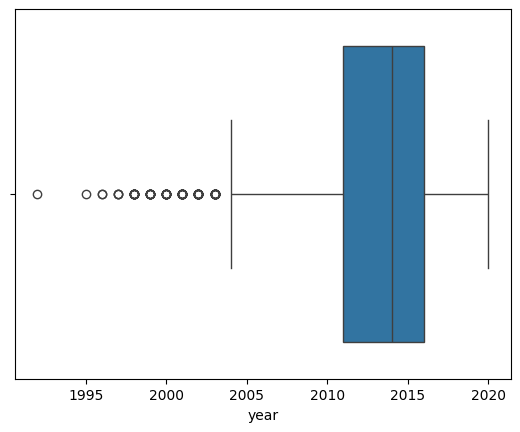

In [449]:
sns.boxplot(x=df['year'])
# sns.boxplot(x=df['selling_price'])
# sns.boxplot(x=df['km_driven'])



In [450]:
# Finding the IQR 
percentile25 = df['year'].quantile(0.25)
percentile75 = df['year'].quantile(0.75)

# percentile25 = df['selling_price'].quantile(0.25)
# percentile75 = df['selling_price'].quantile(0.75)

# percentile25 = df['km_driven'].quantile(0.25)
# percentile75 = df['km_driven'].quantile(0.75)

In [451]:
IQR = percentile75 - percentile25
IQR

np.float64(5.0)

In [452]:
upper_limit = percentile75 + 1.5*IQR
upper_limit

np.float64(2023.5)

In [453]:
lower_limit = percentile25 - 1.5*IQR
lower_limit

np.float64(2003.5)

In [454]:
df[df['year']>upper_limit]
df[df['selling_price']>upper_limit]
df[df['km_driven']>upper_limit]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC BSII,1992,50000,100000,Petrol,Individual,Manual,Fourth & Above Owner
1,Maruti Gypsy E MG410W ST,1995,95000,100000,Petrol,Individual,Manual,Second Owner
2,Mahindra Jeep CL 500 MDI,1996,250000,35000,Diesel,Individual,Manual,Second Owner
3,Mahindra Jeep MM 540,1996,200000,60000,Diesel,Individual,Manual,First Owner
4,Mahindra Jeep CL 500 MDI,1997,150000,120000,Diesel,Individual,Manual,Third Owner
...,...,...,...,...,...,...,...,...
4330,Maruti Alto 800 LXI,2020,347000,5000,Petrol,Individual,Manual,First Owner
4332,Maruti Eeco CNG 5 Seater AC BSIV,2020,495000,7000,CNG,Individual,Manual,First Owner
4334,Maruti Alto 800 VXI,2020,210000,40000,Petrol,Individual,Manual,First Owner
4336,Hyundai Grand i10 1.2 Kappa Magna BSIV,2020,545000,5000,Petrol,Individual,Manual,First Owner


In [455]:
df[df['year']<lower_limit]
df[df['selling_price']<lower_limit]
df[df['km_driven']<lower_limit]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
255,Mahindra Jeep CJ 500 DI,2006,575000,1001,Diesel,Dealer,Manual,First Owner
1783,Renault Duster 85PS Diesel RxL,2013,450000,1000,Diesel,Dealer,Manual,Second Owner
1786,Renault Duster 85PS Diesel RxL,2013,450000,1000,Diesel,Dealer,Manual,Second Owner
1789,Renault Duster 85PS Diesel RxL,2013,450000,1000,Diesel,Dealer,Manual,Second Owner
1792,Renault Duster 85PS Diesel RxL,2013,450000,1000,Diesel,Dealer,Manual,Second Owner
1830,Renault Duster 85PS Diesel RxL,2013,450000,1000,Diesel,Dealer,Manual,Second Owner
1833,Renault Duster 85PS Diesel RxL,2013,450000,1000,Diesel,Dealer,Manual,Second Owner
1902,Renault Duster 85PS Diesel RxL,2013,450000,1000,Diesel,Dealer,Manual,Second Owner
1912,Renault Duster 85PS Diesel RxL,2013,450000,1000,Diesel,Dealer,Manual,Second Owner
1946,Renault Duster 85PS Diesel RxL,2013,450000,1000,Diesel,Dealer,Manual,Second Owner


In [456]:
newdf = df[df['year']<upper_limit]
newdf = df[df['selling_price']<upper_limit]
newdf = df[df['km_driven']<upper_limit]

In [457]:
# newdf

<function matplotlib.pyplot.show(close=None, block=None)>

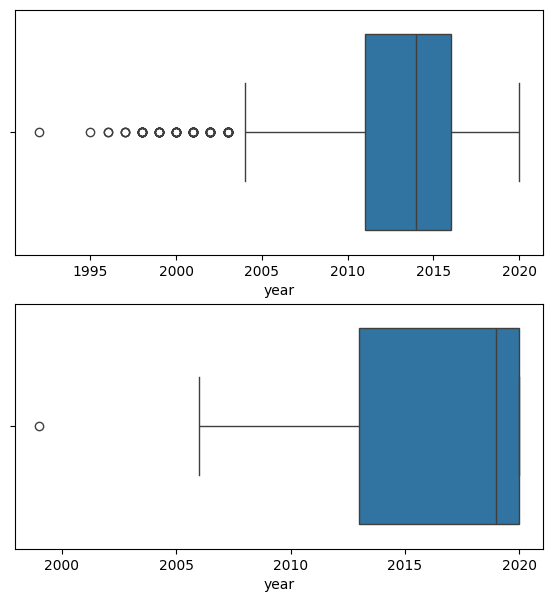

In [458]:
# Comparision 
plt.figure(figsize=(15,7))

plt.subplot(222)
sns.boxplot(x=df['year'])

plt.subplot(224)
sns.boxplot(x=newdf['year'])
plt.show

# plt.figure(figsize=(15,7))

# plt.subplot(222)
# sns.boxplot(x=df['selling_price'])

# plt.subplot(224)
# sns.boxplot(x=newdf['selling_price'])
# plt.show

# plt.figure(figsize=(15,7))

# plt.subplot(222)
# sns.boxplot(x=df['km_driven'])

# plt.subplot(224)
# sns.boxplot(x=newdf['km_driven'])
# plt.show

In [459]:
new_df_cap = df.copy() 

In [460]:
new_df_cap['year']=np.where(
    new_df_cap['year']>upper_limit,upper_limit,

    np.where(
        new_df_cap['year']<lower_limit,lower_limit,
        new_df_cap['year']
    )
)

# new_df_cap['selling_price']=np.where(
#     new_df_cap['selling_price']>upper_limit,upper_limit,

#     np.where(
#         new_df_cap['selling_price']<lower_limit,lower_limit,
#         new_df_cap['selling_price']
#     )
# )

# new_df_cap['km_driven']=np.where(
#     new_df_cap['km_driven']>upper_limit,upper_limit,

#     np.where(
#         new_df_cap['km_driven']<lower_limit,lower_limit,
#         new_df_cap['km_driven']
#     )
# )

<function matplotlib.pyplot.show(close=None, block=None)>

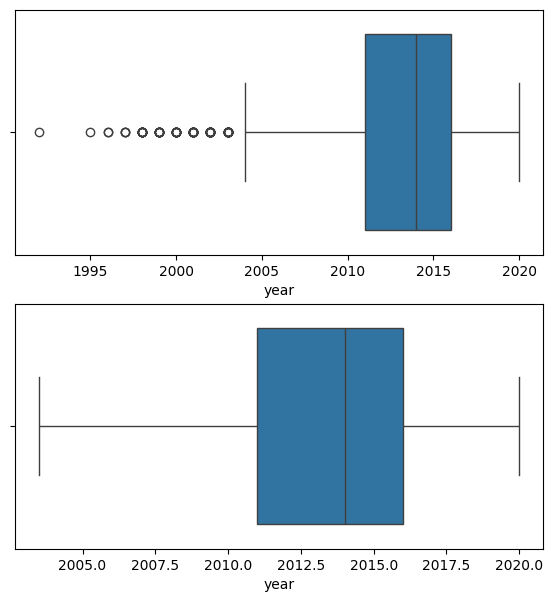

In [461]:
# Comparision 
plt.figure(figsize=(15,7))

plt.subplot(222)
sns.boxplot(x=df['year'])

plt.subplot(224)
sns.boxplot(x=new_df_cap['year'])
plt.show

# # Comparision 
# plt.figure(figsize=(15,7))

# plt.subplot(222)
# sns.boxplot(x=df['selling_price'])

# plt.subplot(224)
# sns.boxplot(x=new_df_cap['selling_price'])
# plt.show

# plt.figure(figsize=(15,7))

# plt.subplot(222)
# sns.boxplot(x=df['km_driven'])

# plt.subplot(224)
# sns.boxplot(x=new_df_cap['km_driven'])
# plt.show

In [462]:
cf = pd.read_csv(r"D:\py_machine_learning\datasets\credit_scoring - credit_scoring (1).csv")
cf.head(2)

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371,9,3619000,5.19,60,Auto Loan


In [494]:
cf.isnull().sum()

Age                          0
Gender                       0
Marital Status               0
Education Level              0
Employment Status            0
Credit Utilization Ratio     0
Payment History              0
Number of Credit Accounts    0
Loan Amount                  0
Interest Rate                0
Loan Term                    0
Type of Loan                 0
dtype: int64

In [524]:
cf = cf.drop(columns=['Type of Loan'])

In [525]:
cf.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
0,60,Male,Married,Master,Employed,0.22,2685,2,4675000,2.65,48
1,25,Male,Married,High School,Unemployed,0.20,2371,9,3619000,5.19,60
2,30,Female,Single,Master,Employed,0.22,2771,6,957000,2.76,12
3,58,Female,Married,PhD,Unemployed,0.12,1371,2,4731000,6.57,60
4,32,Male,Married,Bachelor,Self-Employed,0.99,828,2,3289000,6.28,36


In [514]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [528]:
oe=OrdinalEncoder(categories=[
    ['Male','Female'],
    ['Married', 'Single', 'Divorced'],
    ['Master', 'High School', 'PhD', 'Bachelor'],
    ['Employed', 'Unemployed', 'Self-Employed']
    ])

cf_arr = oe.fit_transform(cf)

ValueError: Shape mismatch: if categories is an array, it has to be of shape (n_features,).

ValueError: Shape mismatch: if categories is an array, it has to be of shape (n_features,).